In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Funcoes uteis

In [32]:
def dict_dtypes(df):
    g = df.columns.to_series().groupby(df.dtypes).groups
    dict_dtypes = {k.name: v for k, v in g.items()}
    return dict_dtypes

def count_columns_nans(df,column):
    return df[column].isna().sum()

def count_columns_zeros(df,column):
    return df[df[column]==0][column].count()

def count_columns_nuniques(df,column):
    return df[column].nunique()

def list_columns_dtypes(df):
    print(df.dtypes.reset_index())
    
def df_report_lenta(df):
    dfs = []
    for column in df.columns:
        df_temp = pd.DataFrame({'dtype':  [df[column].dtype],
        'count_nans': [count_columns_nans(df,column)],
        'count_zeros': [count_columns_zeros(df,column)],
        'count_uniques':[count_columns_nuniques(df,column)]})
        dfs.append(df_temp)
    df_report = pd.concat(dfs)
    return df_report

def df_report(df,m0):
    keyList = ['column','dtype','count_nans','count_zeros','count_uniques'] 
    dict_results = {key: [] for key in keyList} 
    for column in df.columns:
        dict_results['column'].append(column)
        dict_results['dtype'].append(df[column].dtype)
        dict_results['count_nans'].append(count_columns_nans(df,column))
        dict_results['count_zeros'].append(count_columns_zeros(df,column))
        dict_results['count_uniques'].append(count_columns_nuniques(df,column))
    df_result = pd.DataFrame.from_dict(dict_results)
    df_result['percent_nans'] = (df_result['count_nans']/df.ClientId.count())*100
    df_result['percent_zeros'] = (df_result['count_zeros']/df.ClientId.count())*100
    df_result.to_excel('../Reports/df_report_{0}.xlsx'.format(m0))
    return df_result.values
    

### 1. Load Data

In [3]:
df2 = pd.read_csv('../data/raw/m0_junho/variaveis_transacionais.csv')

In [4]:
# df2.head()

In [5]:
df2.columns

Index(['ClientId', 'M0', 'DATA_CONTRATACAO_CREDITO', 'RANDOM_ID', 'ID_NORM',
       'RANDOM_ID_NORM', 'EVER60', 'VALOR_ATRASO_MAX_EVER60',
       'VALOR_ATRASO_MAX_MENOR60D', 'ATRASO_M0',
       ...
       'FLAG_PAYMENT_DEAL_CREDIT_CARD_ACCOUNT_DEBIT',
       'FLAG_PAYMENT_DEBIT_INTERNATIONAL', 'FLAG_PAYMENT_CREDIT_INTERNATIONAL',
       'VALUE_CREDITCARD_CONTRACT_FINE', 'VALUE_CREDITCARD_PARCELING_INVOICE',
       'VALUE_CREDITCARD_', 'VALUE_CREDITCARD_INTERNATIONAL',
       'VALUE_CREDITCARD_CREDITCARD_NACIONAL',
       'VALUE_CREDITCARD_REFINANCING_CREDIT',
       'VALUE_CREDITCARD_REFINACING_FEE'],
      dtype='object', length=198)

In [6]:
len(df2.columns)

198

In [7]:
df2.FLAG_PAYMENT_CREDIT_INTERNATIONAL.unique()

array([0, 1])

In [8]:
df_report = pd.DataFrame(df_report(df2, 'junho'), columns=['column','dtype','count_nans','count_zeros','count_uniques', 'percent_nans', 'percent_zeros'] )

### 2. Dropando Colunas com muitos zeros

In [9]:
percent_zeros_admited = 80

In [10]:
columns_to_keep = df_report[df_report.percent_zeros<=percent_zeros_admited].column.to_list()

In [11]:
# ref_list = ['ClientId', 'M0', 'DATA_CONTRATACAO_CREDITO', 'RANDOM_ID', 'ID_NORM',
#        'RANDOM_ID_NORM', 'EVER60', 'VALOR_ATRASO_MAX_EVER60',
#        'VALOR_ATRASO_MAX_MENOR60D', 'ATRASO_M0']
ref_list = ['ClientId', 'M0', 'DATA_CONTRATACAO_CREDITO', 'EVER60']
columns_to_keep = columns_to_keep + ref_list
columns_to_keep = list(dict.fromkeys(columns_to_keep))
# columns_to_keep = columns_to_keep[-3:] + columns_to_keep[:-3]
columns_to_keep.remove('RANDOM_ID')
columns_to_keep.remove('ID_NORM')
columns_to_keep.remove('RANDOM_ID_NORM')
columns_to_keep.remove('STATUS_CONTA_M0')
columns_to_keep.remove('VALOR_ATRASO_MAX_MENOR60D')
columns_to_keep.remove('LAST_TRANSACTION_DATE')
columns_to_keep.remove('IS_NEON_PLUS_AT_THAT_TIME')
columns_to_keep = columns_to_keep[-1:] + columns_to_keep[:-1]



In [12]:
len(columns_to_keep)

52

In [13]:
columns_to_keep

['EVER60',
 'ClientId',
 'M0',
 'DATA_CONTRATACAO_CREDITO',
 'VALUE_ACCOUNT_CREDIT_INFLOW',
 'VALUE_INVOICE_PAYMENT_INFLOW',
 'VALUE_INSTALLMENT_PAYMENT_INFLOW',
 'VALUE_GIFTS_INFLOW',
 'VALUE_RECEIPTS_INFLOW',
 'VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW',
 'VALUE_BARS_RESTAURANTS_OUTFLOW',
 'VALUE_PERSONAL_CARE_OUTFLOW',
 'VALUE_SEND_OUTFLOW',
 'VALUE_RECREATION_OUTFLOW',
 'VALUE_MARKETPLACE_OUTFLOW',
 'VALUE_HOME_RENT_OUTFLOW',
 'VALUE_NOT_CATEGORIZED_OUTFLOW',
 'VALUE_OTHERS_OUTFLOW',
 'VALUE_INVOICE_PAYMENT_OUTFLOW',
 'VALUE_HEALTH_OUTFLOW',
 'VALUE_TRANSPORTATION',
 'VALUE_CLOTHES_OUTFLOW',
 'COUNT_SUBSCRIPTIONS_SERVICES',
 'COUNT_BARS_RESTAURANTS',
 'COUNT_ACCOUNT_CREDIT',
 'COUNT_PERSONAL_CARE',
 'COUNT_SEND',
 'COUNT_RECREATION',
 'COUNT_MARKETPLACE',
 'COUNT_HOME_RENT',
 'COUNT_NOT_CATEGORIZED',
 'COUNT_OTHERS',
 'COUNT_INVOICE_PAYMENT',
 'COUNT_INSTALLMENT_PAYMENT',
 'COUNT_GIFTS',
 'COUNT_RECEIPTS',
 'COUNT_HEALTH',
 'COUNT_SERVICE_CHARGE',
 'COUNT_TRANSPORTATION',
 'COUNT_CLOTHE

In [14]:
# columns_to_keep

In [15]:
columns_to_keep[4:20]

['VALUE_ACCOUNT_CREDIT_INFLOW',
 'VALUE_INVOICE_PAYMENT_INFLOW',
 'VALUE_INSTALLMENT_PAYMENT_INFLOW',
 'VALUE_GIFTS_INFLOW',
 'VALUE_RECEIPTS_INFLOW',
 'VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW',
 'VALUE_BARS_RESTAURANTS_OUTFLOW',
 'VALUE_PERSONAL_CARE_OUTFLOW',
 'VALUE_SEND_OUTFLOW',
 'VALUE_RECREATION_OUTFLOW',
 'VALUE_MARKETPLACE_OUTFLOW',
 'VALUE_HOME_RENT_OUTFLOW',
 'VALUE_NOT_CATEGORIZED_OUTFLOW',
 'VALUE_OTHERS_OUTFLOW',
 'VALUE_INVOICE_PAYMENT_OUTFLOW',
 'VALUE_HEALTH_OUTFLOW']

### 3. Variáveis Transacionais

In [16]:
len(columns_to_keep)

52

In [17]:
df2.columns

Index(['ClientId', 'M0', 'DATA_CONTRATACAO_CREDITO', 'RANDOM_ID', 'ID_NORM',
       'RANDOM_ID_NORM', 'EVER60', 'VALOR_ATRASO_MAX_EVER60',
       'VALOR_ATRASO_MAX_MENOR60D', 'ATRASO_M0',
       ...
       'FLAG_PAYMENT_DEAL_CREDIT_CARD_ACCOUNT_DEBIT',
       'FLAG_PAYMENT_DEBIT_INTERNATIONAL', 'FLAG_PAYMENT_CREDIT_INTERNATIONAL',
       'VALUE_CREDITCARD_CONTRACT_FINE', 'VALUE_CREDITCARD_PARCELING_INVOICE',
       'VALUE_CREDITCARD_', 'VALUE_CREDITCARD_INTERNATIONAL',
       'VALUE_CREDITCARD_CREDITCARD_NACIONAL',
       'VALUE_CREDITCARD_REFINANCING_CREDIT',
       'VALUE_CREDITCARD_REFINACING_FEE'],
      dtype='object', length=198)

In [18]:
x = len(ref_list)

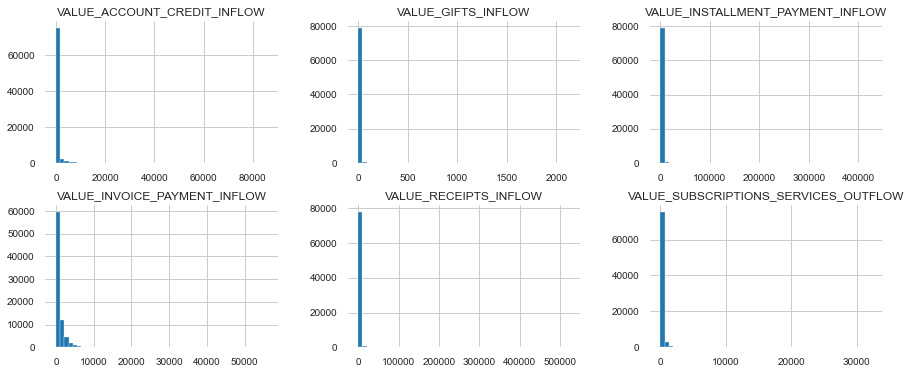

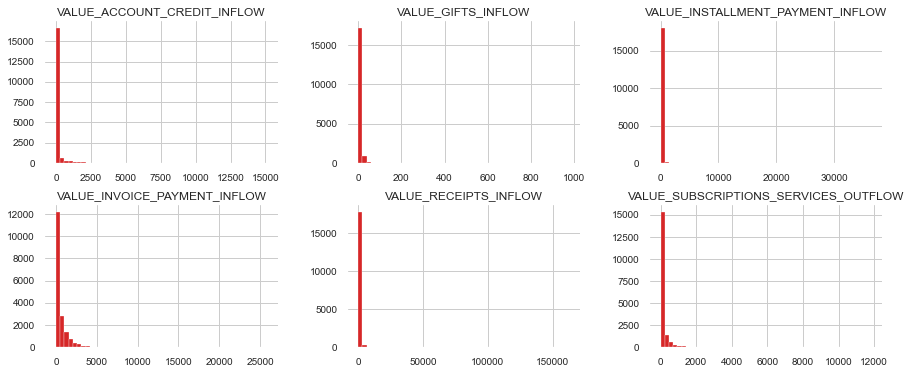

In [19]:
df2[df2.EVER60==0][columns_to_keep[x:x+6]].hist(bins=50, figsize=(15, 6), layout=(2, 3), color = 'tab:blue');
df2[df2.EVER60==1][columns_to_keep[x:x+6]].hist(bins=50, figsize=(15, 6), layout=(2, 3), color ='tab:red');

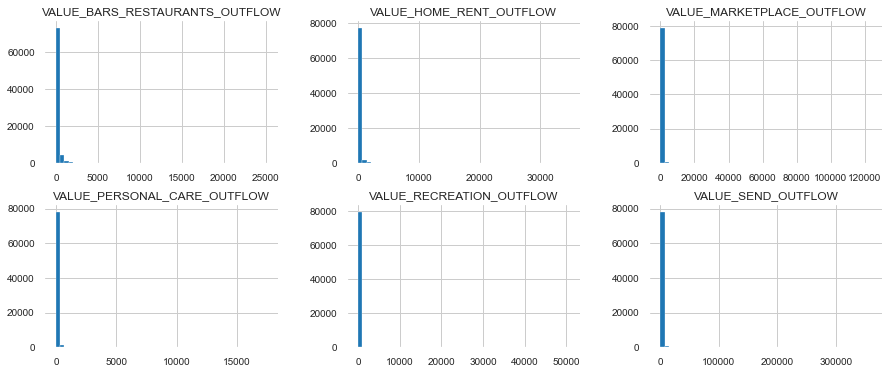

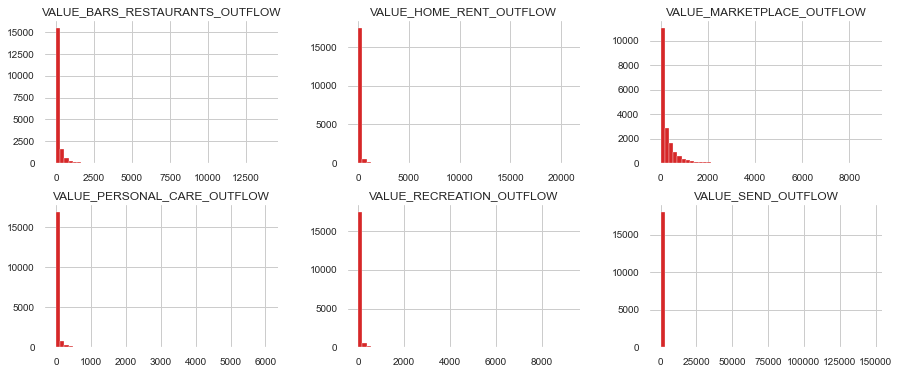

In [20]:
df2[df2.EVER60==0][columns_to_keep[x+6:x+12]].hist(bins=50, figsize=(15, 6), layout=(2, 3));
df2[df2.EVER60==1][columns_to_keep[x+6:x+12]].hist(bins=50, figsize=(15, 6), layout=(2, 3), color='tab:red');

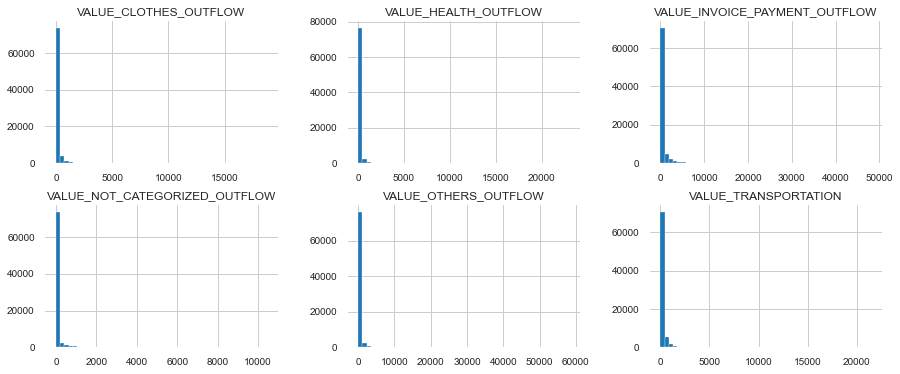

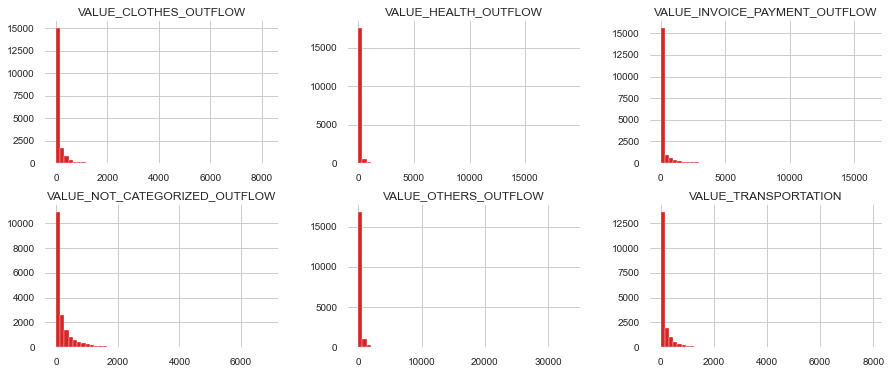

In [21]:
df2[df2.EVER60==0][columns_to_keep[x+12:x+18]].hist(bins=50, figsize=(15, 6), layout=(2, 3));
df2[df2.EVER60==1][columns_to_keep[x+12:x+18]].hist(bins=50, figsize=(15, 6), layout=(2, 3), color='tab:red');

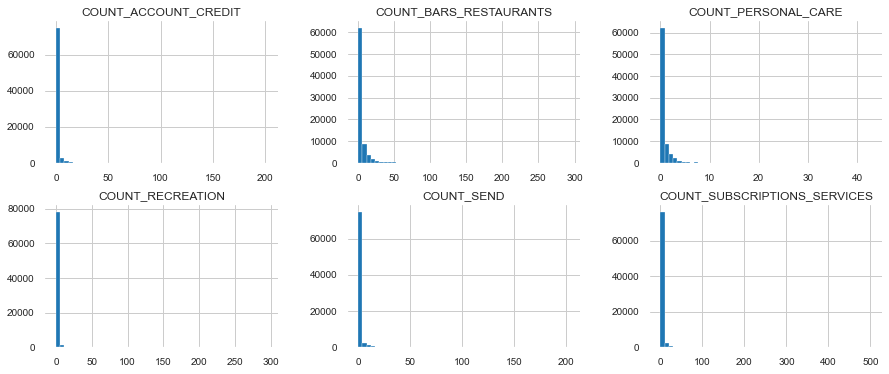

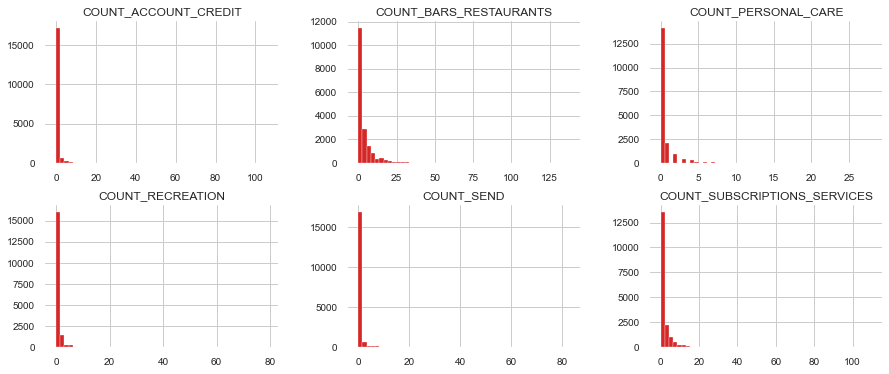

In [22]:
df2[df2.EVER60==0][columns_to_keep[x+18:x+24]].hist(bins=50, figsize=(15, 6), layout=(2, 3));
df2[df2.EVER60==1][columns_to_keep[x+18:x+24]].hist(bins=50, figsize=(15, 6), layout=(2, 3), color='tab:red');

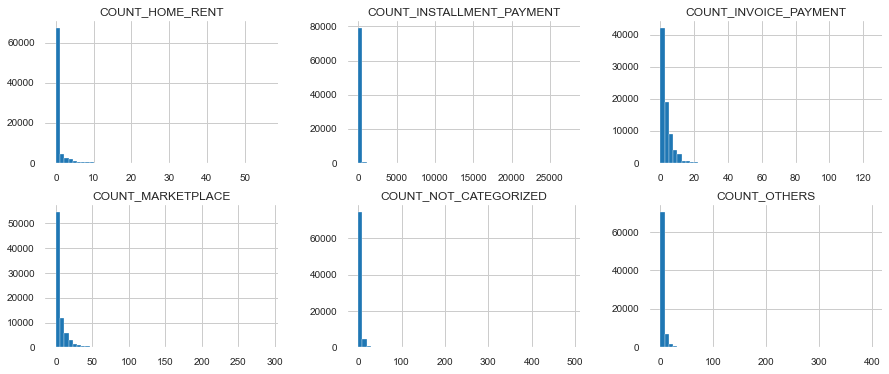

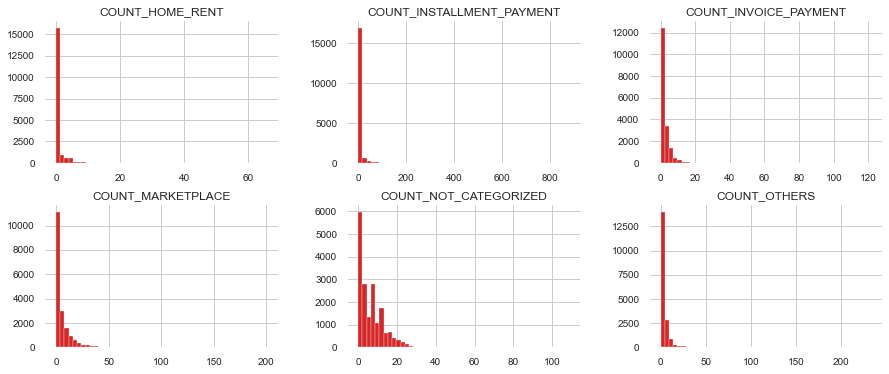

In [23]:
df2[df2.EVER60==0][columns_to_keep[x+24:x+30]].hist(bins=50, figsize=(15, 6), layout=(2, 3));
df2[df2.EVER60==1][columns_to_keep[x+24:x+30]].hist(bins=50, figsize=(15, 6), layout=(2, 3), color='tab:red');

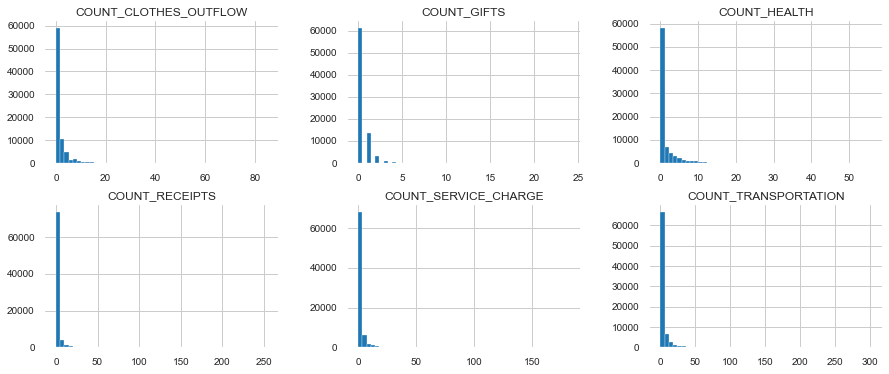

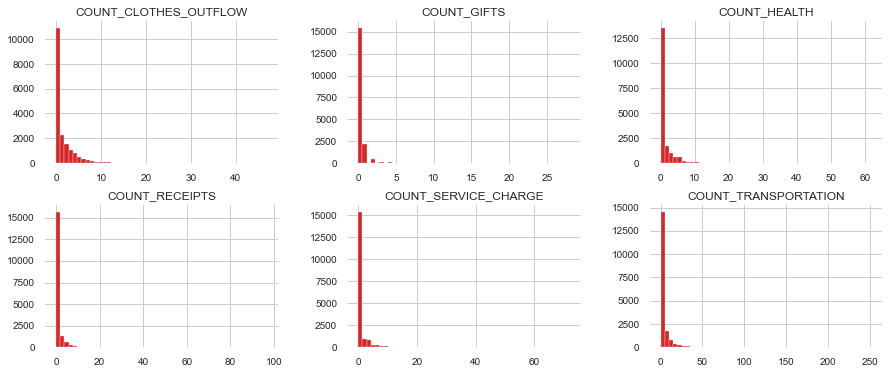

In [24]:
df2[df2.EVER60==0][columns_to_keep[x+30:x+36]].hist(bins=50, figsize=(15, 6), layout=(2, 3));
df2[df2.EVER60==1][columns_to_keep[x+30:x+36]].hist(bins=50, figsize=(15, 6), layout=(2, 3), color='tab:red');

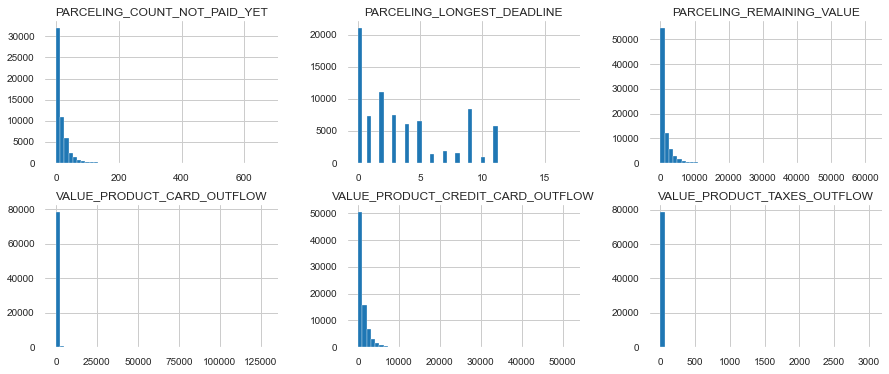

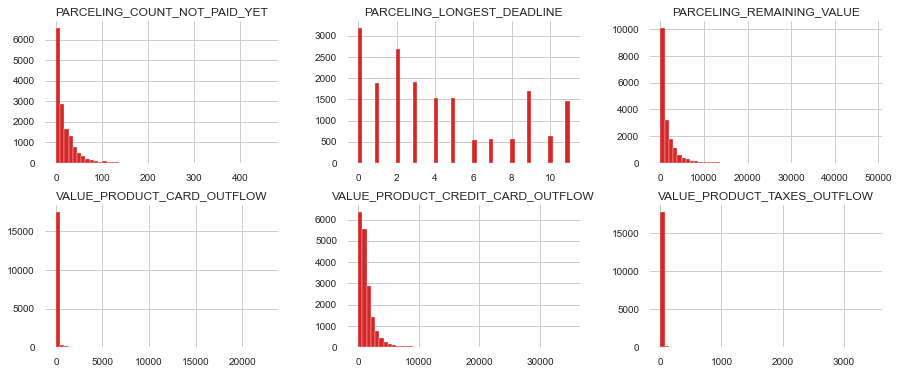

In [25]:
df2[df2.EVER60==0][columns_to_keep[x+36:x+42]].hist(bins=50, figsize=(15, 6), layout=(2, 3));
df2[df2.EVER60==1][columns_to_keep[x+36:x+42]].hist(bins=50, figsize=(15, 6), layout=(2, 3), color='tab:red');

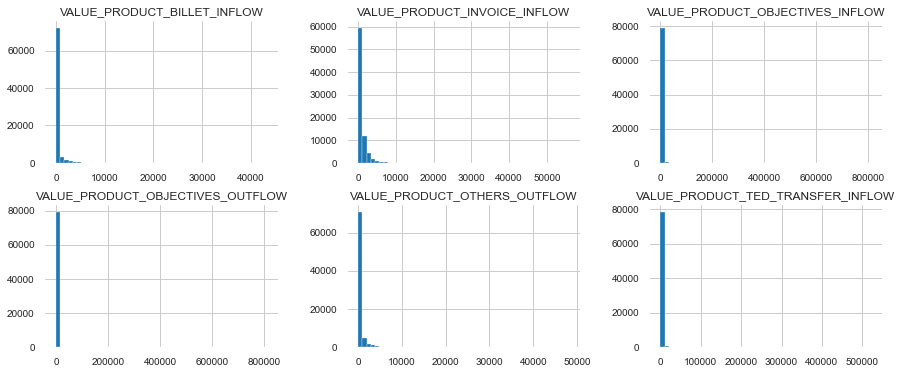

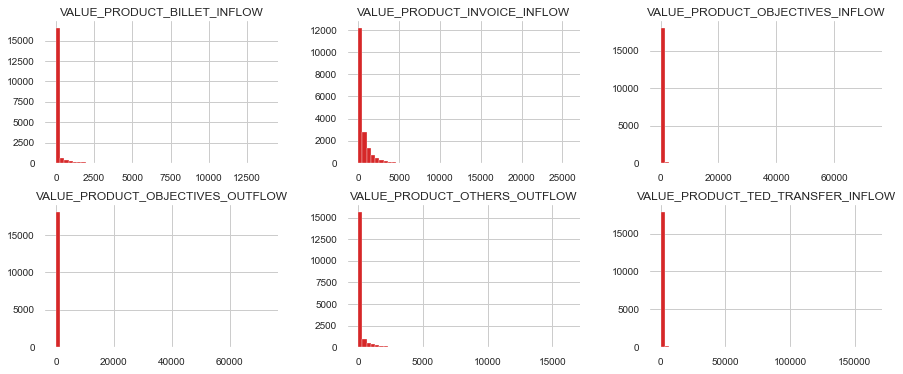

In [26]:
df2[df2.EVER60==0][columns_to_keep[x+42:x+48]].hist(bins=50, figsize=(15, 6), layout=(2, 3));
df2[df2.EVER60==1][columns_to_keep[x+42:x+48]].hist(bins=50, figsize=(15, 6), layout=(2, 3), color='tab:red');

### 4. Variáveis Cadastrais

In [28]:
df_amostra_cadastrais = pd.read_csv('../data/raw/variaveis_bureau.csv')

/Users/dafne.coelho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
df_amostra_cadastrais.columns

Index(['ClientId', 'DataAberturaConta', 'DataAtivacaoConta', 'DataNascimento',
       'NeonPlusFirstDate', 'LastTransactionDate', 'AddressNeighborhood',
       'AddressCity', 'AddressState', 'Profissao', 'InstallSource',
       'SKProductFirstTransaction', 'Device', 'Platform', 'OSVersion',
       'CampaignId', 'AdSetId', 'AdvertisementId', 'InvitationOriginCPF_CNPJ',
       'PossuiProtesto', 'PossuiVeiculo', 'FlagInvitedUser', 'FlagActive',
       'FlagCompany', 'FlagEmployee', 'FlagCreditFamilyAndFriends',
       'FlagInvitationUsed', 'ScoreBureau', 'ReceitaBase', 'ReceitaTeto',
       'score', 'Renda', 'DeclaredIncome', 'StartDepositValue'],
      dtype='object')

In [30]:
df_amostra_cadastrais['SKProductFirstTransaction'] = df_amostra_cadastrais['SKProductFirstTransaction'].astype(str)
df_amostra_cadastrais['AdSetId'] = df_amostra_cadastrais['AdSetId'].astype(str)
df_amostra_cadastrais['AdvertisementId'] = df_amostra_cadastrais['AdvertisementId'].astype(str)
df_amostra_cadastrais['InvitationOriginCPF_CNPJ'] = df_amostra_cadastrais['InvitationOriginCPF_CNPJ'].astype(str)

In [33]:
df_report_cadastrais = pd.DataFrame(df_report(df_amostra_cadastrais, 'categoricas'), columns=['column','dtype','count_nans','count_zeros','count_uniques', 'percent_nans', 'percent_zeros'])

In [34]:
# df_report_categoricas.sort_values(by=['percent_nans', 'percent_zeros'])

#### Categoricas

In [35]:
df_report_cadastrais[df_report_cadastrais['dtype']=='object'].sort_values(by=['count_nans', 'count_uniques'])

column   dtype count_nans count_zeros count_uniques  \
11  SKProductFirstTransaction  object          0           0            32   
16                    AdSetId  object          0           0           802   
17            AdvertisementId  object          0           0          2250   
18   InvitationOriginCPF_CNPJ  object          0           0        158619   
1           DataAberturaConta  object          0           0       2070358   
13                   Platform  object      62227           0             3   
14                  OSVersion  object     183088           0           124   
12                     Device  object     183089           0          4847   
10              InstallSource  object     639659           0           128   
8                AddressState  object     766955           0            99   
7                 AddressCity  object     766955           0          8681   
6         AddressNeighborhood  object     766957           0        129191   
3              DataNascimento  object     769433           0         20614   
15                 CampaignId  object    1117574           0           237   
2           DataAtivacaoConta  object    1360438           0           494   
5         LastTransactionDate  object    1360440           0           494   
4           NeonPlusFirstDate  object    1398992           0        730083   
9                   Profissao  object    1506531           0          2190   

   percent_nans percent_zeros  
11            0             0  
16            0             0  
17            0             0  
18            0             0  
1             0             0  
13      2.91442             0  
14      8.57499             0  
12      8.57504             0  
10      29.9587             0  
8       35.9206             0  
7       35.9206             0  
6       35.9207             0  
3       36.0367             0  
15       52.342             0  
2       63.7166             0  
5       63.7167             0  
4       65.5223             0  
9       70.5589             0

columns_to_drop:
- AdressCity: muitos dados, muito tratamento
- AddressNeighborhood: muitos dados, muito tratamento
- PossuiProtesto: poucos dados, insignificante

columns_to_keep:
Colunas com poucos nans e poucos uniques.

In [36]:
columns_to_keep_cadastrais_categ = ['ClientId','SKProductFirstTransaction','Platform', 'Device', 'InstallSource', 'AddressState']

#### Numericas

In [37]:
df_report_cadastrais[df_report_cadastrais['dtype']=='int'].sort_values(by=['count_zeros'])

column  dtype count_nans count_zeros count_uniques  \
0                     ClientId  int64          0           0       2127388   
23                 FlagCompany  int64          0           0             1   
26          FlagInvitationUsed  int64          0      317878             2   
22                  FlagActive  int64          0     1816194             2   
21             FlagInvitedUser  int64          0     1885058             2   
24                FlagEmployee  int64          0     2134645             2   
25  FlagCreditFamilyAndFriends  int64          0     2135139             1   

   percent_nans percent_zeros  
0             0             0  
23            0             0  
26            0       14.8879  
22            0       85.0621  
21            0       88.2874  
24            0       99.9769  
25            0           100

In [38]:
columns_to_keep_cadastrais_int = ['FlagInvitationUsed', 'FlagActive']

In [39]:
df_report_cadastrais[df_report_cadastrais['dtype']=='float'].sort_values(by=['count_zeros'])

column    dtype count_nans count_zeros count_uniques  \
19     PossuiProtesto  float64    2135115          24             1   
27        ScoreBureau  float64     766954        7960          1000   
32     DeclaredIncome  float64      33173       11317         17753   
33  StartDepositValue  float64          0       23456             3   
28        ReceitaBase  float64     792603       66803           157   
29        ReceitaTeto  float64     801436       66803           156   
31              Renda  float64     742615      101984        178097   
30              score  float64     767279     1154697             7   
20      PossuiVeiculo  float64     768916     1273258             2   

   percent_nans percent_zeros  
19      99.9989    0.00112405  
27      35.9206      0.372809  
32      1.55367      0.530036  
33            0       1.09857  
28      37.1218       3.12874  
29      37.5355       3.12874  
31      34.7806       4.77646  
30      35.9358       54.0806  
20      36.0125       59.6335

In [40]:
columns_to_keep_cadastrais_float = ['FlagInvitationUsed', 'FlagActive']

### Graficos categoricas

In [41]:
df_cadastrais = df_amostra_cadastrais[columns_to_keep_cadastrais_categ+
                                     columns_to_keep_cadastrais_int+
                                     columns_to_keep_cadastrais_float]

In [42]:
df = df2[columns_to_keep].merge(df_cadastrais[columns_to_keep_cadastrais_categ], on ='ClientId')

In [43]:
df_cadastrais.columns

Index(['ClientId', 'SKProductFirstTransaction', 'Platform', 'Device',
       'InstallSource', 'AddressState', 'FlagInvitationUsed', 'FlagActive',
       'FlagInvitationUsed', 'FlagActive'],
      dtype='object')

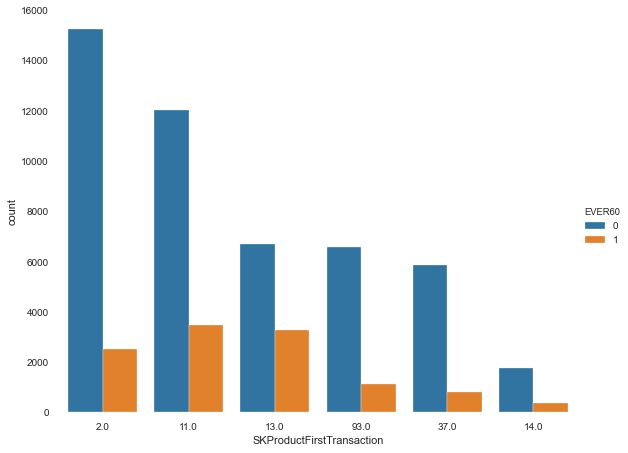

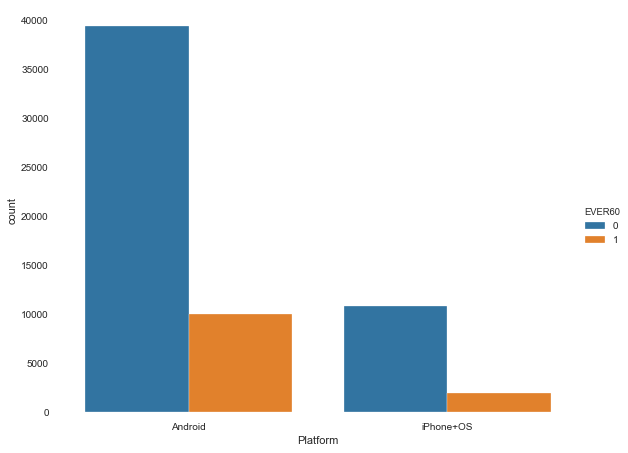

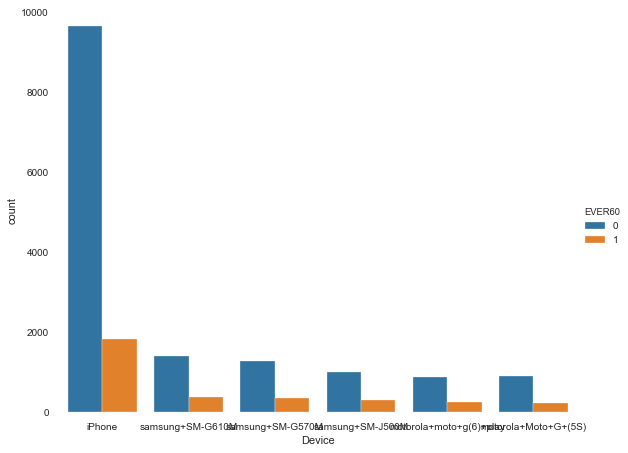

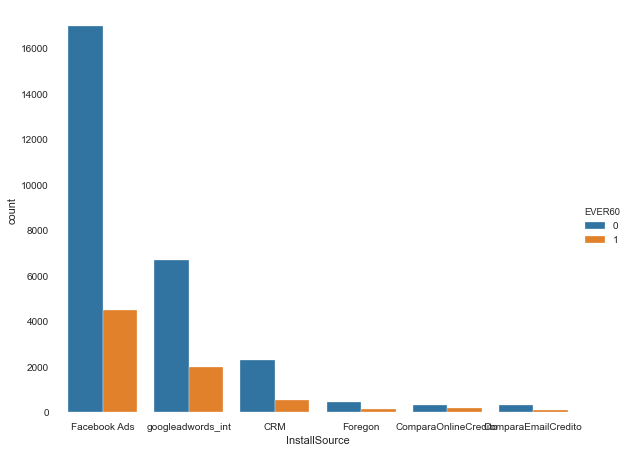

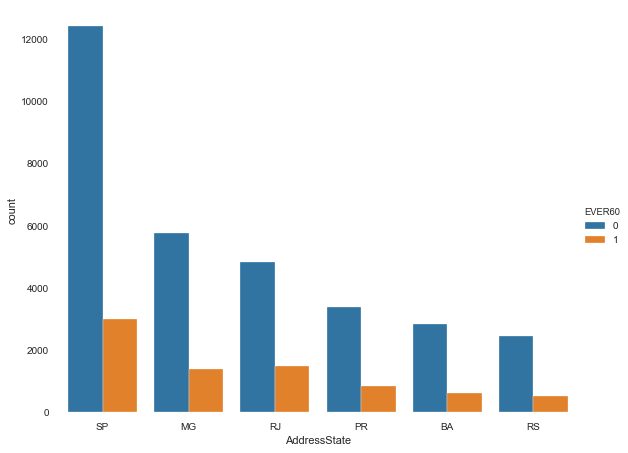

In [44]:
sns.catplot(x="SKProductFirstTransaction", kind="count", data=df, height=6.4, aspect=5/4, order=df.SKProductFirstTransaction.value_counts().iloc[:6].index, hue='EVER60')

sns.catplot(x="Platform", kind="count", data=df, height=6.4, aspect=5/4, order=df.Platform.value_counts().iloc[:6].index, hue='EVER60')

sns.catplot(x="Device", kind="count", data=df, height=6.4, aspect=5/4, order=df.Device.value_counts().iloc[:6].index, hue='EVER60')

sns.catplot(x="InstallSource", kind="count", data=df, height=6.4, aspect=5/4, order=df.InstallSource.value_counts().iloc[:6].index, hue='EVER60')

sns.catplot(x="AddressState", kind="count", data=df, height=6.4, aspect=5/4, order=df.AddressState.value_counts().iloc[:6].index, hue='EVER60')

In [45]:
len(df.columns)

57

### Juntando datasets

In [46]:
df1 = pd.read_csv('../data/raw/m0_maio/variaveis_transacionais.csv')
df2 = pd.read_csv('../data/raw/m0_junho/variaveis_transacionais.csv')
df3 = pd.read_csv('../data/raw/m0_julho/variaveis_transacionais.csv')
df4 = pd.read_csv('../data/raw/m0_agosto/variaveis_transacionais.csv')
df5 = pd.read_csv('../data/raw/m0_setembro/variaveis_transacionais.csv')

In [47]:
df1 = df1[columns_to_keep].merge(df_cadastrais[columns_to_keep_cadastrais_categ], on ='ClientId')
df2 = df2[columns_to_keep].merge(df_cadastrais[columns_to_keep_cadastrais_categ], on ='ClientId')
df2 = df2[columns_to_keep].merge(df_cadastrais[columns_to_keep_cadastrais_categ], on ='ClientId')
df3 = df3[columns_to_keep].merge(df_cadastrais[columns_to_keep_cadastrais_categ], on ='ClientId')
df4 = df4[columns_to_keep].merge(df_cadastrais[columns_to_keep_cadastrais_categ], on ='ClientId')
df5 = df5[columns_to_keep].merge(df_cadastrais[columns_to_keep_cadastrais_categ], on ='ClientId')
                                

In [48]:
df_total = pd.concat([df1, df2, df3, df4, df5],  ignore_index=True)

In [49]:
len(df.columns)

57

In [50]:
df_total.to_csv('../data/interim/out1.csv', index =False)